In [1]:
# https://www.kaggle.com/mlg-ulb/creditcardfraud

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
def mysplit(df, test_size=0.3) :
    df_X = df.iloc[:, :-1]
    df_y = df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=test_size, random_state=0, stratify=df_y)   #------Stratified 기반 분할
    return  X_train, X_test, y_train, y_test

In [4]:
def myscore(y_test,pred,proba, pr_curve=0, auc_curve=0):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test, proba[:,-1])
    print("Accuracy:{:.6f}  precision:{:.6f}, recall:{:.6f}, f1:{:.6f}, auc:{:.6f}".format(accuracy, precision, recall, f1, auc))

    mtx = confusion_matrix(y_test, pred)
    print(mtx)
    
    if pr_curve==1:
        mycurve(y_test, proba)
    if auc_curve==1:
        mycurve_auc(y_test, proba)
        

In [5]:
from sklearn.metrics import precision_recall_curve
def mycurve(y_test, proba):  
    precision, recall, thresholds = precision_recall_curve(y_test, proba[ : , -1])
    print(len(precision), len(recall), len(thresholds))  #66 66 65
    plt.plot(thresholds, precision[:len(thresholds)], label="precision")
    plt.plot(thresholds, recall[:len(thresholds)], label="recall")
    plt.xlabel("thresholds")
    plt.ylabel("score")
    plt.grid()
    plt.legend()
    plt.show()
    

In [6]:
def mycurve_auc(y_test, proba):  
    fpr, tpr, thresholds = roc_curve(y_test, proba[:,-1])
    print(len(fpr), len(tpr), len(thresholds))  #66 66 65
    plt.plot(fpr, tpr, label="roc")
    plt.plot([0,1], [0,1], label="th:0.5")
    plt.xlabel("FPR (1-TNR(specificity)")      #FP
    plt.ylabel("TPR (recall,sensitivity)") #TP
    plt.title(f"auc : {roc_auc_score(y_test, proba[:,-1]):.4f}")
    plt.grid()
    plt.legend()
    plt.show()

In [7]:
df = pd.read_csv('creditcard.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

  ## EDA

In [11]:
sacler_val = np.log1p(df["Amount"])  #Amount
df.insert(0, 'T_Amount', sacler_val)
df[["Amount", "T_Amount"]]

,Amount,T_Amount
0,149.62,5.014760
1,2.69,1.305626
2,378.66,5.939276
3,123.50,4.824306
4,69.99,4.262539
...,...,...
284802,0.77,0.570980
284803,24.79,3.249987
284804,67.88,4.232366
284805,10.00,2.397895


In [12]:
# Time : 일반/정상 거래...
df.drop(["Amount"], inplace=True, axis=1)
df

,T_Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,5.014760,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.305626,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,5.939276,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,4.824306,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,4.262539,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.570980,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,3.249987,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,4.232366,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,2.397895,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [13]:
# MinMax StandardScaler ---?

In [14]:
# Time : 일반/정상 거래...
df.drop(["Time"], inplace=True, axis=1)

### 0 데이터 확인

In [15]:
nan_dict = {"CNT": df.isin([0]).sum(),
           "RATE": df.isin([0]).sum()/df.shape[0]*100}
nan_df = pd.DataFrame(nan_dict)
print(nan_df[nan_df["RATE"]>0].sort_values("CNT", ascending=False))

             CNT       RATE
Class     284315  99.827251
T_Amount    1825   0.640785


In [16]:
df.corrwith(df["Class"]).sort_values(ascending=False)

Class       1.000000
V11         0.154876
V4          0.133447
V2          0.091289
V21         0.040413
V19         0.034783
V20         0.020090
V8          0.019875
V27         0.017580
V28         0.009536
V26         0.004455
V25         0.003308
V22         0.000805
V23        -0.002685
V15        -0.004223
V13        -0.004570
V24        -0.007221
T_Amount   -0.008326
V6         -0.043643
V5         -0.094974
V9         -0.097733
V1         -0.101347
V18        -0.111485
V7         -0.187257
V3         -0.192961
V16        -0.196539
V10        -0.216883
V12        -0.260593
V14        -0.302544
V17        -0.326481
dtype: float64

##  검증
 * GridSearchCV cv=10회
 * 교차검증

In [17]:
df_y = df.iloc[:, -1]  #df["traget"]  
df_X = df.iloc[:, :-1]
print(len(df_y), df_X.shape)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=36,  shuffle=True)
print(X_train.shape, X_test.shape, len(y_train), len(y_test))

284807 (284807, 29)
(227845, 29) (56962, 29) 227845 56962


In [18]:
dt = DecisionTreeClassifier(random_state=36)

0.9088220147761981
DecisionTreeClassifier(max_depth=5, random_state=36)
{'max_depth': 5, 'min_samples_split': 2}
F1 : 0.950547
Accuracy:0.999719  precision:0.948052, recall:0.858824, f1:0.901235, auc:0.941087
[[56873     4]
 [   12    73]]
9 9 8


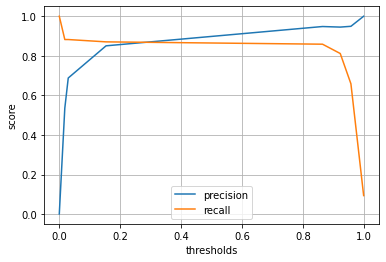

10 10 10


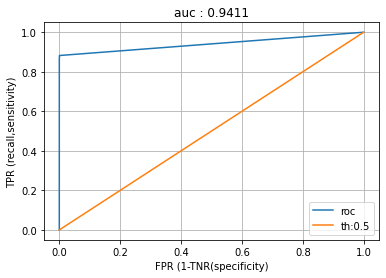

In [19]:
from sklearn.model_selection import GridSearchCV
#cross_val_score +  param_grid(튜닝) / refit=True(best모델반영)
# depth가 깊어질수록 결정트리는 과적합되기 쉬워 예측 성능이 저하될 수 있다
# min_samples_split 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
myparam = {'max_depth':[1,3,5], 'min_samples_split':[1,2,3]}
GCV_model = GridSearchCV(dt, param_grid=myparam, refit=True, cv=10, scoring='f1_macro',verbose=0)
GCV_model.fit(X_train, y_train)

#max_depth 4번 * min_samples_split 3번 * cv=10  = 총 120번 학습
print(GCV_model.best_score_)
print(GCV_model.best_estimator_)
print(GCV_model.best_params_)

pred = GCV_model.predict(X_test)  
df_score = f1_score(y_test, pred, average='macro')
print("F1 : {:.6f}".format(df_score))


proba = GCV_model.predict_proba(X_test)
myscore(y_test, pred, proba, pr_curve=1, auc_curve=1)

# 0.9083462500525215, {'max_depth': 5, 'min_samples_split': 2}, F1 : 0.947778 executed in 2m 36s

In [42]:
lr = LogisticRegression(random_state = 36)

0.8615196812030403
LogisticRegression(C=10, random_state=36)
{'C': 10, 'penalty': 'l2'}
F1 : 0.862838
Accuracy:0.999298  precision:0.868852, recall:0.623529, f1:0.726027, auc:0.985200
[[56869     8]
 [   32    53]]
32477 32477 32476


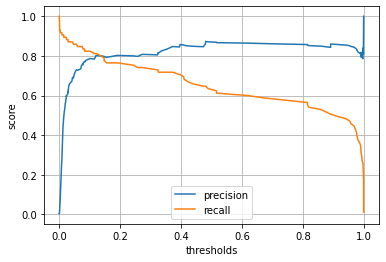

936 936 936


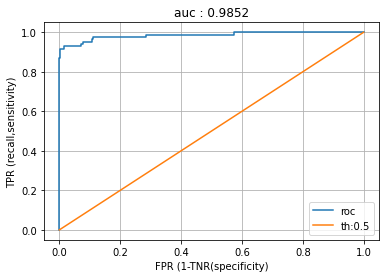

In [44]:
from sklearn.model_selection import GridSearchCV
#cross_val_score +  param_grid(튜닝) / refit=True(best모델반영)
# depth가 깊어질수록 결정트리는 과적합되기 쉬워 예측 성능이 저하될 수 있다
# min_samples_split 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
myparam = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}
GCV_model = GridSearchCV(lr, param_grid=myparam, refit=True, cv=10, scoring='f1_macro',verbose=0)
GCV_model.fit(X_train, y_train)

print(GCV_model.best_score_)
print(GCV_model.best_estimator_)
print(GCV_model.best_params_)

pred = GCV_model.predict(X_test)  
df_score = f1_score(y_test, pred, average='macro') 
print("F1 : {:.6f}".format(df_score))


proba = GCV_model.predict_proba(X_test)
myscore(y_test, pred, proba, pr_curve=1, auc_curve=1)
# Accuracy:0.999298  precision:0.868852, recall:0.623529, f1:0.726027, auc:0.985200, executed in 1m 19.1s

Accuracy:0.999298  precision:0.868852, recall:0.623529, f1:0.726027, auc:0.985412
[[56869     8]
 [   32    53]]
31793 31793 31792


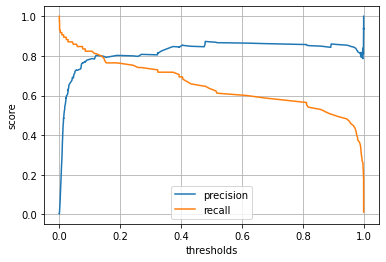

935 935 935


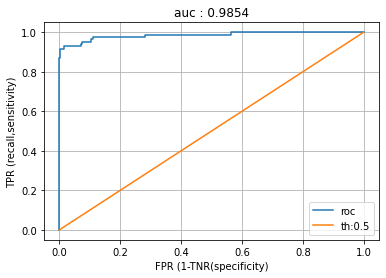

In [21]:
lr = LogisticRegression(random_state = 36)
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)
proba_lr = lr.predict_proba(X_test)
myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)

Accuracy:0.999315  precision:0.734694, recall:0.847059, f1:0.786885, auc:0.923301
[[56851    26]
 [   13    72]]
3 3 2


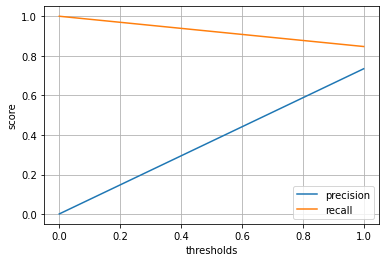

3 3 3


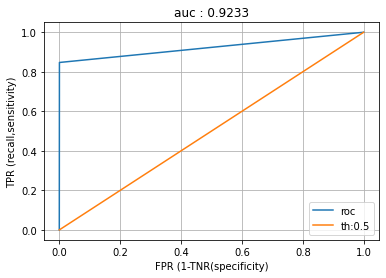

In [22]:
dt = DecisionTreeClassifier(random_state = 36)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
proba_dt = dt.predict_proba(X_test)
myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)

Accuracy:0.999684  precision:0.958904, recall:0.823529, f1:0.886076, auc:0.981634
[[56874     3]
 [   15    70]]
21941 21941 21940


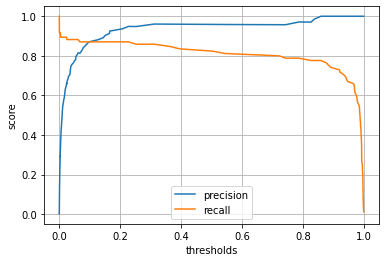

5397 5397 5397


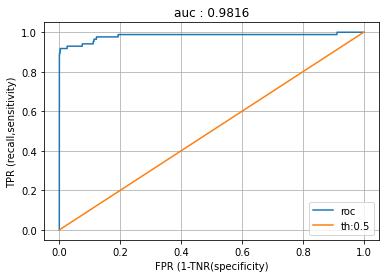

In [47]:
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(X_train, y_train)
pred_dt = lgbm.predict(X_test)
proba_dt = lgbm.predict_proba(X_test)
myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)

Class       1.000000
V11         0.154876
V4          0.133447
V2          0.091289
V21         0.040413
V19         0.034783
V20         0.020090
V8          0.019875
V27         0.017580
V28         0.009536
V26         0.004455
V25         0.003308
V22         0.000805
V23        -0.002685
V15        -0.004223
V13        -0.004570
V24        -0.007221
T_Amount   -0.008326
V6         -0.043643
V5         -0.094974
V9         -0.097733
V1         -0.101347
V18        -0.111485
V7         -0.187257
V3         -0.192961
V16        -0.196539
V10        -0.216883
V12        -0.260593
V14        -0.302544
V17        -0.326481
dtype: float64

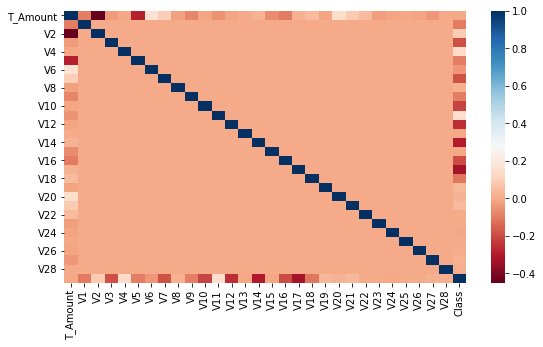

In [24]:
plt.figure(figsize=(9, 5))
sns.heatmap(df.corr(), cmap='RdBu')  #under_df.corr()

df.corrwith(df["Class"]).sort_values(ascending=False)

## 언더샘플링 
- 과적합 많이 나옴
- 현업에서 거의 안쓰임
- 공모전에서는 점수 올리려고 쓰긴 함 

In [25]:
from imblearn.over_sampling  import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics  import classification_report_imbalanced
from sklearn.metrics   import classification_report
from sklearn.pipeline  import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.utils     import shuffle

### 언더샘플링 - NearMiss build model

In [26]:
from collections import Counter

In [27]:
print('Distribution of Target Variable in Original Data: {}\n'.format(Counter(df_y)))
print('Distribution of Target Variable in Training Set of Original Data: {}\n'.format(Counter(y_train)))
print('Distribution of Target Variable in Test Set of Original Data: {}\n'.format(Counter(y_test)))

Distribution of Target Variable in Original Data: Counter({0: 284315, 1: 492})

Distribution of Target Variable in Training Set of Original Data: Counter({0: 227438, 1: 407})

Distribution of Target Variable in Test Set of Original Data: Counter({0: 56877, 1: 85})



In [28]:
X_train_NearMiss, y_train_NearMiss = NearMiss().fit_resample(X_train.values, y_train.values)
X_test_NearMiss, y_test_NearMiss   = NearMiss().fit_resample(X_test.values, y_test.values)
print('after NearMiss(train): {}\n'.format(Counter(y_train_NearMiss)))
print('after NearMiss(test): {}\n'.format(Counter(y_test_NearMiss)))


after NearMiss(train): Counter({0: 407, 1: 407})

after NearMiss(test): Counter({0: 85, 1: 85})



### 언더샘플링 - shuffle

In [29]:
# NearMiss와 동일 코드 
# Shuffle 언더프레임
df = df.sample(frac=1)   #shuffle
df1 = df.loc[df['Class'] == 1]
df0 = df.loc[df['Class'] == 0][:len(df1)]
under_df_f1f0 = pd.concat([df1, df0])
under_df = under_df_f1f0.sample(frac=1, random_state=42)

Accuracy:0.811765  precision:1.000000, recall:0.623529, f1:0.768116, auc:0.957647
[[85  0]
 [32 53]]
168 168 167


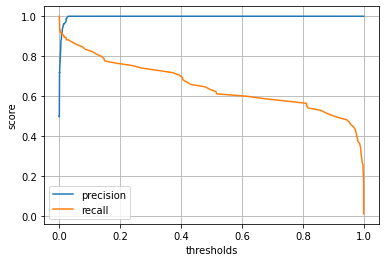

25 25 25


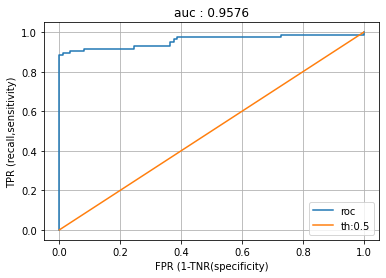

In [30]:
lr_clf = LogisticRegression(random_state = 36)
lr_clf.fit(X_train_NearMiss,y_train_NearMiss)
pred_lr = lr.predict(X_test_NearMiss)
proba_lr = lr.predict_proba(X_test_NearMiss)
myscore(y_test_NearMiss, pred_lr, proba_lr, pr_curve=1, auc_curve=1)

## 오버샘플링

In [32]:
from imblearn.over_sampling import SMOTE

In [39]:
smote = SMOTE(random_state=0)
print('SMOTE 사용 전 train ', X_train.shape, y_train.shape)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 사용 후 train_over ', X_train_over.shape, y_train_over.shape)
print('SMOTE 사용 후 y_train_over ', pd.Series(y_train_over).value_counts())

SMOTE 사용 전 train  (227845, 29) (227845,)
SMOTE 사용 후 train_over  (454876, 29) (454876,)
SMOTE 사용 후 y_train_over  0    227438
1    227438
Name: Class, dtype: int64


Accuracy:0.999298  precision:0.868852, recall:0.623529, f1:0.726027, auc:0.985412
[[56869     8]
 [   32    53]]
31793 31793 31792


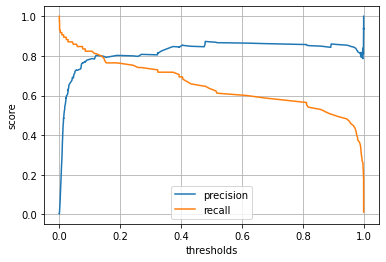

935 935 935


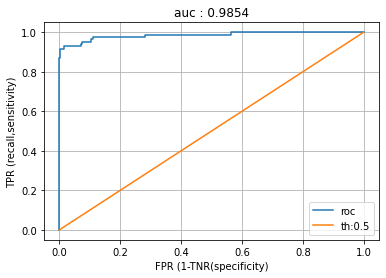

In [40]:
lr_clf = LogisticRegression(random_state = 36)
lr_clf.fit(X_train_over,y_train_over)
pred_lr = lr.predict(X_test)
proba_lr = lr.predict_proba(X_test)
myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)

Accuracy:0.999596  precision:0.860465, recall:0.870588, f1:0.865497, auc:0.970717
[[56865    12]
 [   11    74]]
55130 55130 55129


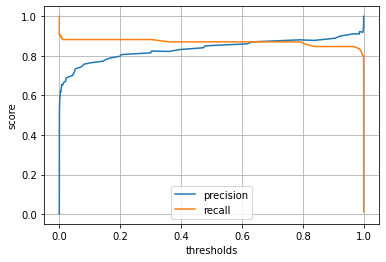

1096 1096 1096


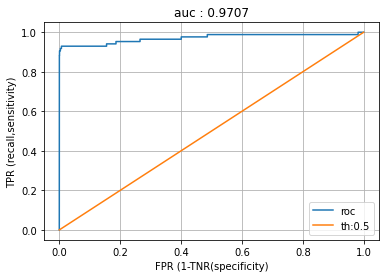

In [59]:
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm.fit(X_train_over, y_train_over)
pred_dt = lgbm.predict(X_test)
proba_dt = lgbm.predict_proba(X_test)
myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)

## 이상치 제거

In [109]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==0][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [110]:
outlier_index = get_outlier(df=df, column='V14', weight=1.5)
print('이상치 인덱스', outlier_index)

이상치 인덱스 Int64Index([253570, 128408, 192568,  12543, 274564, 244427, 149676,  23832,
            170377,  16486,
            ...
            271248, 211391, 222492, 172927,  15496, 153445, 282364, 278081,
              7320, 197156],
           dtype='int64', length=13800)


In [111]:
df_copy = df.copy()

In [112]:
df_copy.drop(outlier_index, axis=0, inplace=True)

Accuracy:0.999561  precision:0.966667, recall:0.798165, f1:0.874372, auc:0.964907
[[56849     3]
 [   22    87]]
18759 18759 18758


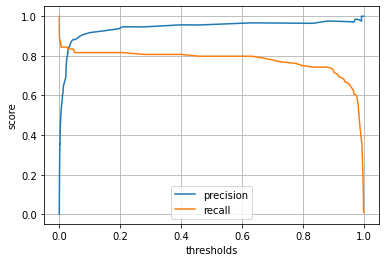

4914 4914 4914


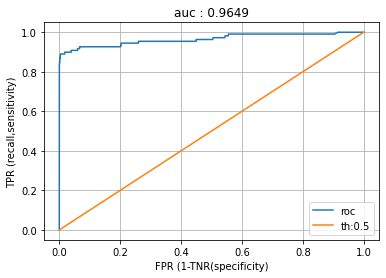

In [113]:
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(X_train, y_train)
pred_dt = lgbm.predict(X_test)
proba_dt = lgbm.predict_proba(X_test)
myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)

### 이상치 제거 후, 오버샘플링

In [114]:
df_y = df_copy.iloc[:, -1]  #df["traget"]  
df_X = df_copy.iloc[:, :-1]
print(len(df_y), df_X.shape)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=36,  shuffle=True)
print(X_train.shape, X_test.shape, len(y_train), len(y_test))

271007 (271007, 29)
(216805, 29) (54202, 29) 216805 54202


In [115]:
smote = SMOTE(random_state=0)
print('SMOTE 사용 전 train ', X_train.shape, y_train.shape)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 사용 후 train_over ', X_train_over.shape, y_train_over.shape)
print('SMOTE 사용 후 y_train_over ', pd.Series(y_train_over).value_counts())

SMOTE 사용 전 train  (216805, 29) (216805,)
SMOTE 사용 후 train_over  (432808, 29) (432808,)
SMOTE 사용 후 y_train_over  0    216404
1    216404
Name: Class, dtype: int64


Accuracy:0.999354  precision:0.769231, recall:0.879121, f1:0.820513, auc:0.987903
[[54087    24]
 [   11    80]]
12904 12904 12903


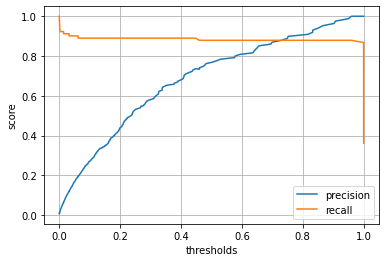

2803 2803 2803


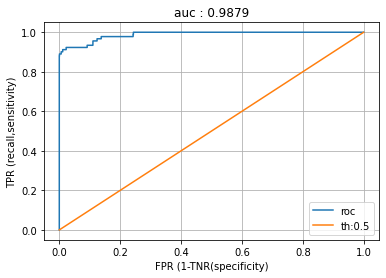

In [117]:
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(X_train_over, y_train_over)
pred_dt = lgbm.predict(X_test)
proba_dt = lgbm.predict_proba(X_test)
myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)